In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [3]:
pwd

'/content'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,Sequential
from sklearn.metrics import confusion_matrix

In [5]:
%matplotlib inline

In [6]:
# df_clean = pd.read_csv('C:\\Users\\rahmi\\OneDrive\\Desktop\\vital signs using federated learning\\dataset\\patient_chart_cleansing.csv')

In [7]:
# df_clean.head()

In [8]:
# df_original = pd.read_csv('C:\\Users\\rahmi\\OneDrive\\Desktop\\vital signs using federated learning\\dataset\\all_patient_charts.csv')

In [9]:
# df_original.head()

In [10]:
# df = pd.read_csv('C:\\Users\\rahmi\\OneDrive\\Desktop\\vital signs using federated learning\\dataset\\new_dataset.csv')

In [11]:
# df.head()

In [12]:
# df['label'] = 0

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/new_dataset.csv')

In [14]:
df.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,start_time,end_time
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,2166-10-06 02:44:00,2166-10-06 03:14:00
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,2166-10-06 03:44:00,2166-10-06 04:14:00
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,2166-10-06 04:44:00,2166-10-06 05:14:00
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,2166-10-06 05:44:00,2166-10-06 06:14:00
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,2166-10-06 06:44:00,2166-10-06 07:14:00


In [15]:
df.iloc[:,1]

0          97.0
1          96.0
2          95.0
3          96.0
4          97.0
           ... 
2292024    98.0
2292025    99.0
2292026    98.0
2292027    96.0
2292028    97.0
Name: spo2, Length: 2292029, dtype: float64

In [16]:
cols = ['spo2', 'bpm', 'rr', 'sbp', 'dbp', 'mbp']
df['merge_values'] = df[cols].apply(lambda x: '/'.join(x.values.astype(str)), axis=1)

In [17]:
df.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,start_time,end_time,merge_values
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,2166-10-06 02:44:00,2166-10-06 03:14:00,97.0/63.5/18.0/112.0/78.0/87.0
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,2166-10-06 03:44:00,2166-10-06 04:14:00,96.0/64.0/16.0/106.0/71.0/81.0
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,2166-10-06 04:44:00,2166-10-06 05:14:00,95.0/61.0/15.0/105.0/65.0/78.0
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,2166-10-06 05:44:00,2166-10-06 06:14:00,96.0/63.0/23.0/102.0/65.0/76.0
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,2166-10-06 06:44:00,2166-10-06 07:14:00,97.0/57.0/18.0/105.0/75.0/84.0


In [18]:
all_values = df['merge_values'].str.split(pat="/")
all_values

0          [97.0, 63.5, 18.0, 112.0, 78.0, 87.0]
1          [96.0, 64.0, 16.0, 106.0, 71.0, 81.0]
2          [95.0, 61.0, 15.0, 105.0, 65.0, 78.0]
3          [96.0, 63.0, 23.0, 102.0, 65.0, 76.0]
4          [97.0, 57.0, 18.0, 105.0, 75.0, 84.0]
                           ...                  
2292024    [98.0, 67.0, 19.0, 108.5, 57.5, 73.5]
2292025    [99.0, 65.0, 18.0, 103.0, 63.0, 75.0]
2292026    [98.0, 66.0, 23.0, 107.0, 65.0, 78.0]
2292027     [96.0, 67.0, 11.0, 95.0, 56.5, 69.0]
2292028    [97.0, 67.0, 18.0, 107.0, 56.0, 71.0]
Name: merge_values, Length: 2292029, dtype: object

In [19]:
df.head(2)

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,start_time,end_time,merge_values
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,2166-10-06 02:44:00,2166-10-06 03:14:00,97.0/63.5/18.0/112.0/78.0/87.0
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,2166-10-06 03:44:00,2166-10-06 04:14:00,96.0/64.0/16.0/106.0/71.0/81.0


In [20]:
def diseases(symptoms):
    
    spo2 = float(symptoms[0])
    hr = float(symptoms[1])
    rr = float(symptoms[2])
    sbp = float(symptoms[3])
    dbp = float(symptoms[4])
    mbp = float(symptoms[5])
    
    Three = ((spo2<91) and (sbp<70)) | ((hr>130) and (rr>30))
    
    Two = ((hr<40) and (rr<=9) and((spo2>=91) and (spo2<=93)) and ((sbp>=70) and (sbp<=80))) | (((hr>=111) and (hr<=130)) and ((rr>=21) and (rr<=30)) and (sbp>=200))
    
    One = (((hr>=40) and (hr<=50)) and ((spo2>=94) and (spo2<=95)) and ((sbp>=81) and (sbp<=180))) | (((hr>=111) and (hr<=110)) and ((rr>=15) and (rr<=20)) and ((sbp>=180) and (sbp<=200)))  
    
    Zero = ((hr>=51) and (hr<=100)) and ((rr>9) and (rr<=14)) and (spo2>95) and ((sbp>=101) and (sbp<180)) 
    
    if Three:
        three = 3
        return three
    if Two:
        two = 2
        return two
    if One:
        one = 1
        return one
    if Zero:
        zero = 0
        return zero
    else:
        normal = 00


        return normal

In [21]:
df['labels'] = all_values.apply(diseases)

In [22]:
df['labels'].value_counts()

0    2278880
3       8719
1       4158
2        272
Name: labels, dtype: int64

In [23]:
df.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,start_time,end_time,merge_values,labels
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,2166-10-06 02:44:00,2166-10-06 03:14:00,97.0/63.5/18.0/112.0/78.0/87.0,0
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,2166-10-06 03:44:00,2166-10-06 04:14:00,96.0/64.0/16.0/106.0/71.0/81.0,0
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,2166-10-06 04:44:00,2166-10-06 05:14:00,95.0/61.0/15.0/105.0/65.0/78.0,0
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,2166-10-06 05:44:00,2166-10-06 06:14:00,96.0/63.0/23.0/102.0/65.0/76.0,0
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,2166-10-06 06:44:00,2166-10-06 07:14:00,97.0/57.0/18.0/105.0/75.0/84.0,0


In [24]:
labeled_data = df.copy()

In [25]:
labeled_data.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,start_time,end_time,merge_values,labels
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,2166-10-06 02:44:00,2166-10-06 03:14:00,97.0/63.5/18.0/112.0/78.0/87.0,0
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,2166-10-06 03:44:00,2166-10-06 04:14:00,96.0/64.0/16.0/106.0/71.0/81.0,0
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,2166-10-06 04:44:00,2166-10-06 05:14:00,95.0/61.0/15.0/105.0/65.0/78.0,0
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,2166-10-06 05:44:00,2166-10-06 06:14:00,96.0/63.0/23.0/102.0/65.0/76.0,0
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,2166-10-06 06:44:00,2166-10-06 07:14:00,97.0/57.0/18.0/105.0/75.0/84.0,0


In [26]:
labeled_data = labeled_data.drop( ['patient_id','start_time', 'end_time', 'merge_values'], axis=1)

In [27]:
labeled_data.head()

,spo2,bpm,rr,sbp,dbp,mbp,labels
0,97.0,63.5,18.0,112.0,78.0,87.0,0
1,96.0,64.0,16.0,106.0,71.0,81.0,0
2,95.0,61.0,15.0,105.0,65.0,78.0,0
3,96.0,63.0,23.0,102.0,65.0,76.0,0
4,97.0,57.0,18.0,105.0,75.0,84.0,0


In [28]:
df.to_csv('file1.csv')

In [29]:
labels = labeled_data.iloc[:,6]
num_labels = Counter(labels)
num_labels

Counter({0: 2278880, 1: 4158, 2: 272, 3: 8719})

In [30]:
labeled_data['labels'].value_counts()

0    2278880
3       8719
1       4158
2        272
Name: labels, dtype: int64

In [31]:
# sns.distplot(labeled_data['labels'])

In [32]:
# sns.pairplot(labeled_data,hue='labels',palette='coolwarm')

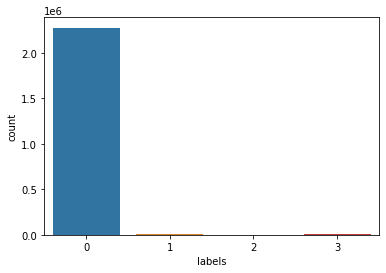

In [33]:
sns.countplot(x='labels',data=labeled_data)

In [34]:
# plt.figure(figsize=(12,8))
# sns.heatmap(labeled_data.corr(), cmap='coolwarm', annot=True)

In [35]:
# sns.set_style('white')
# sns.countplot(x='labels',data=labeled_data)

In [36]:
# labeled_data['labels'].hist()

In [37]:
# labeled_data= labeled_data[labeled_data.labels!= 0]

In [38]:
labeled_data.shape

(2292029, 7)

In [39]:
X = labeled_data.iloc[:, 1:-1].values[:100000]

In [40]:
y = labeled_data.iloc[:, -1].values[:100000]

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
print(type(y))

<class 'numpy.ndarray'>


In [ ]:
X.shape

(100000, 5)

In [ ]:
print(X)

[[ 63.5  18.  112.   78.   87. ]
 [ 64.   16.  106.   71.   81. ]
 [ 61.   15.  105.   65.   78. ]
 ...
 [ 68.   10.  100.   47.   67. ]
 [ 73.   21.  110.   56.   76. ]
 [ 60.   10.   98.   42.   62. ]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(y_train[:10])

(70000, 5)
(70000,)
[0 0 0 0 0 0 0 0 0 0]


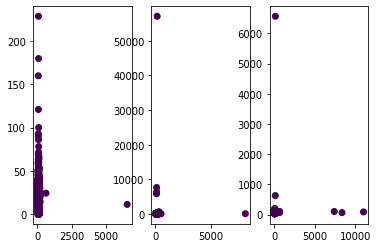

In [ ]:
plt.subplot(1,3,1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

plt.subplot(1,3,2)
plt.scatter(X_train[:,2], X_train[:,3], c=y_train)

plt.subplot(1,3,3)
plt.scatter(X_train[:,4], X_train[:,0], c=y_train)

plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
# y_test = tf.one_hot(y_test, depth=4)
# y_train = tf.one_hot(y_train, depth=4)

y_test = tf.one_hot(tf.cast(tf.reshape(y_test, -1), dtype=tf.int32), depth=4)
y_train = tf.one_hot(tf.cast(tf.reshape(y_train, -1), dtype=tf.int32), depth=4)


In [ ]:
print(y_train[:10])

tf.Tensor(
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]], shape=(10, 4), dtype=float32)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(y_train[:10])

(70000, 5)
(70000, 4)
tf.Tensor(
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]], shape=(10, 4), dtype=float32)


In [ ]:
model = Sequential()

model.add(layers.Dense(128, input_shape=[5]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
Total params: 11,700
Trainable params: 11,700
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
2188/2188 [==============================] - 12s 4ms/step - loss: 0.1315 - accuracy: 0.9879 - val_loss: 0.0409 - val_accuracy: 0.9917
Epoch 2/30
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0414 - accuracy: 0.9917 - val_loss: 0.0368 - val_accuracy: 0.9917
Epoch 3/30
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0401 - accuracy: 0.9917 - val_loss: 0.0396 - val_accuracy: 0.9918
Epoch 4/30
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0393 - accuracy: 0.9917 - val_loss: 0.0398 - val_accuracy: 0.9918
Epoch 5/30
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0385 - accuracy: 0.9918 - val_loss: 0.0343 - val_accuracy: 0.9918
Epoch 6/30
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0381 - accuracy: 0.9918 - val_loss: 0.0385 - val_accuracy: 0.9918
Epoch 7/30
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0373 - accuracy: 0.9918 - val_loss: 0.0418 - val_accuracy

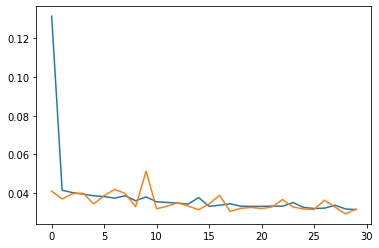

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_range = range(30)

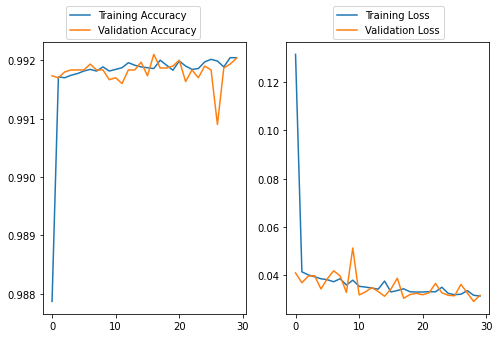

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, accuracy, label='Training Accuracy')
plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
plt.legend(bbox_to_anchor=(0.8,1.15), ncol=1)

plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(bbox_to_anchor=(0.8, 1.15), ncol=1)

plt.show()

In [ ]:
model.evaluate(X_test,y_test)

938/938 [==============================] - 3s 3ms/step - loss: 0.0317 - accuracy: 0.9920


[0.03166010603308678, 0.9920333623886108]

In [ ]:
y_hat = model.predict(X_test)

In [ ]:
print(y_hat[0])
print(y_test[0])

[9.977969e-01 7.234409e-04 1.100940e-03 3.787825e-04]
tf.Tensor([1. 0. 0. 0.], shape=(4,), dtype=float32)


In [ ]:
y_hat = np.argmax(y_hat, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
print(y_hat[:10])
print(y_test[:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0]


In [ ]:
conf_matrix = confusion_matrix(y_test, y_hat)

In [ ]:
conf_matrix

array([[29752,     0,     0,     3],
       [   50,     0,     0,     0],
       [    4,     0,     0,     0],
       [  182,     0,     0,     9]])

In [ ]:
accuracy = (conf_matrix[0,0]+conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[0,0]+conf_matrix[0,1]+conf_matrix[0,2]+conf_matrix[1,0]+conf_matrix[1,1]+conf_matrix[1,2]+conf_matrix[2,0]+conf_matrix[2,1]+conf_matrix[2,2])


In [ ]:
print(accuracy)

0.9981882842380728


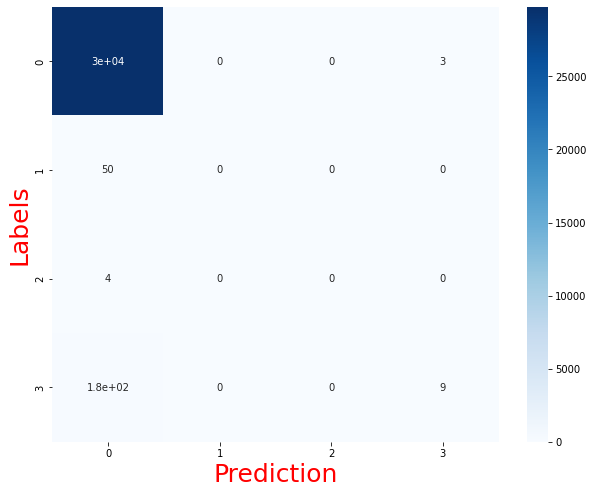

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Prediction', color='r', fontsize=25)
plt.ylabel('Labels', color='r', fontsize=25)
plt.show()